In [74]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import pandas as pd
import os
from sklearn import preprocessing
from random import randrange
%matplotlib inline

In [75]:
Boston = pd.read_csv("/home/techfield/class/Presentations/Boston_Presentation/train.csv")

In [76]:
Boston.shape

(333, 15)

In [77]:
#chas and rad will be dummies, as chas is a 0 or 1 and rad is a code

Boston = Boston.drop(columns = ["ID"])
Boston = pd.get_dummies(Boston,columns = ["chas","rad"])


In [100]:
#Going to use Train-Validate-Test Model, so lets get our data from each

seed = 10
train1=Boston.sample(frac=.6,random_state = seed)
training_target = train1['medv']
train= train1.drop("medv",axis=1)

validate_test = Boston.loc[~Boston.index.isin(train1.index)]

validate_origin = validate_test.sample(frac=.5,random_state = seed )
validate1 = validate_origin.drop("medv",axis=1)
validate_target = validate_origin['medv']
validate = validate1

test = validate_test.loc[~validate_test.index.isin(validate_origin.index)]
test_no_y = test.drop("medv",axis=1)
test_target = test['medv']

In [106]:
validate_target.shape

(66,)

In [102]:
X = np.column_stack((np.ones((200,1)),train)) #200 x 23 Matrix
y = training_target #size is (200,)
train.shape

(200, 22)

We will find an R^2 for our training set first

In [103]:
#Training R2
w = np.linalg.solve(X.T.dot(X), X.T.dot(y)) #Reshape y.reshape([N,1])
y_hat = X.dot(w)


R2 = 1 - np.sum((y-y_hat)**2)/np.sum((y-y.mean())**2) #Gets our R^2
R2

0.7902421541769571

In [113]:
w.shape #size is (23,)

(23,)

In [116]:
X = np.column_stack((np.ones((66,1)),validate)) #66 x 23 Matrix
y = validate_target #size is (66,)
y_hat = X.dot(w) #size is (66,)

y_hat.shape
R2 = 1 - np.sum((y-y_hat)**2)/np.sum((y-y.mean())**2) #Gets our R^2
R2

0.690344823906342

In [82]:
def OLS(y, y_hat):
    return (y - y_hat).dot(y - y_hat)

def R2(y, y_hat):
    return 1 - (y - y_hat).dot(y - y_hat) / (y - y.mean()).dot(y - y.mean())

/home/techfield/.local/lib/python3.5/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in subtract
  if sys.path[0] == '':


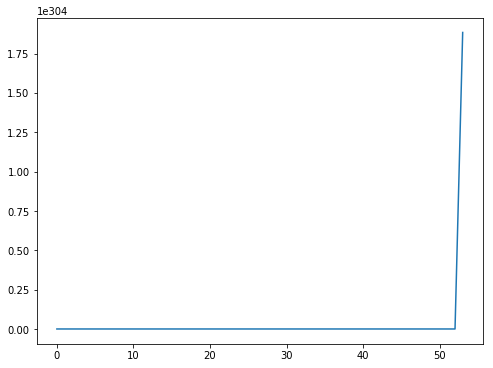

In [84]:
# Fit the Model using Gradient Descent

w = np.random.randn(23)

J = []
eta = 1e-4
epochs = 1e5

for t in range(int(epochs)):
    y_hat = X.dot(w)
    J.append(OLS(y, y_hat))
    w -= eta*X.T.dot(y_hat - y)
    
plt.figure(figsize = (8,6))
plt.plot(J)

In [66]:
print(X[0])

1 - (y - y_hat).dot(y - y_hat) / (y - y.mean()).dot(y - y.mean())

[1.0000e+00 3.5840e-02 8.0000e+01 3.3700e+00 3.9800e-01 6.2900e+00
 1.7800e+01 6.6115e+00 3.3700e+02 1.6100e+01 3.9690e+02 4.6700e+00
 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]


-1.3880671582420425